# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import linregress
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)



In [4]:

# Combine the data into a single DataFrame

mouse_study=pd.merge(study_results,mouse_metadata,on="Mouse ID",how="left")
# Display the data table for preview
mouse_study

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [5]:
# Checking the number of mice. Got nunique code from stack overflow https://stackoverflow.com/questions/45759966/counting-unique-values-in-a-column-in-pandas-dataframe-like-in-qlik
mouse_study["Mouse ID"].nunique()

249

In [6]:
mouse_study.duplicated(subset=["Mouse ID","Timepoint"])

0       False
1       False
2       False
3       False
4       False
        ...  
1888    False
1889    False
1890    False
1891    False
1892    False
Length: 1893, dtype: bool

In [7]:
#Finding if there are any mice with duplicate timepoints.https://sparkbyexamples.com/pandas/pandas-get-list-of-all-duplicate-rows/?expand_article=1 , https://www.statology.org/pandas-find-duplicates/ , https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.duplicated.html
duplicate_timepoints=mouse_study.loc[mouse_study.duplicated(subset=["Mouse ID","Timepoint"]),'Mouse ID'].unique()
print(duplicate_timepoints)

['g989']


In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID. https://sparkbyexamples.com/pandas/pandas-filter-rows-by-conditions/
clean_mouse_study=mouse_study.loc[mouse_study["Mouse ID"]!="g989"]
clean_mouse_study

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [9]:
# Checking the number of mice in the clean DataFrame.
clean_mouse_study["Mouse ID"].nunique()

248

In [11]:
drug_regimen=clean_mouse_study["Drug Regimen"].unique()
drug_regimen_group=clean_mouse_study.groupby(["Drug Regimen"])


In [ ]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen https://favtutor.com/blogs/list-to-dataframe-python#:~:text=To%20turn%20multiple%20lists%20into,to%20the%20pandas%20DataFrame%20constructor.

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
list_to_convert = []
regimen_keys=mouse_study["Drug Regimen"].unique()[1]
for x in drug_regimen:
    matching_rows = clean_mouse_study.loc[clean_mouse_study["Drug Regimen"]==x]
    mean_tumor_volume = matching_rows["Tumor Volume (mm3)"].mean()
    median_tumor_volume=matching_rows["Tumor Volume (mm3)"].median()
    tumor_volume_variance=(matching_rows["Tumor Volume (mm3)"].var())
    stdev_tumor_volume=(matching_rows["Tumor Volume (mm3)"].std())
    sem_tumor_volume=matching_rows["Tumor Volume (mm3)"].sem()
    list_to_convert.append([x, mean_tumor_volume,median_tumor_volume,tumor_volume_variance,stdev_tumor_volume,sem_tumor_volume])
new_dataframe = pd.DataFrame(list_to_convert, columns=["Drug Regimen", "Mean","Median","Variance","Stdev","SEM"])#add more headings
new_dataframe=new_dataframe.sort_values(["Drug Regimen"],ascending=True)
new_dataframe

,Drug Regimen,Mean,Median,Variance,Stdev,SEM
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
9,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
3,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
1,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
2,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
8,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
7,Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
5,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
4,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
6,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


## Summary Statistics

In [ ]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

In [12]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_timepoint_count=drug_regimen_group["Timepoint"].count()
drug_timepoint=pd.DataFrame(drug_timepoint_count)
drug_timepoint=drug_timepoint.sort_values(["Timepoint"],ascending=False)

In [13]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis=np.arange(len(drug_timepoint))
tick_locations=[value for value in x_axis]


Text(0, 0.5, '# of Observed Mice Timepoints')

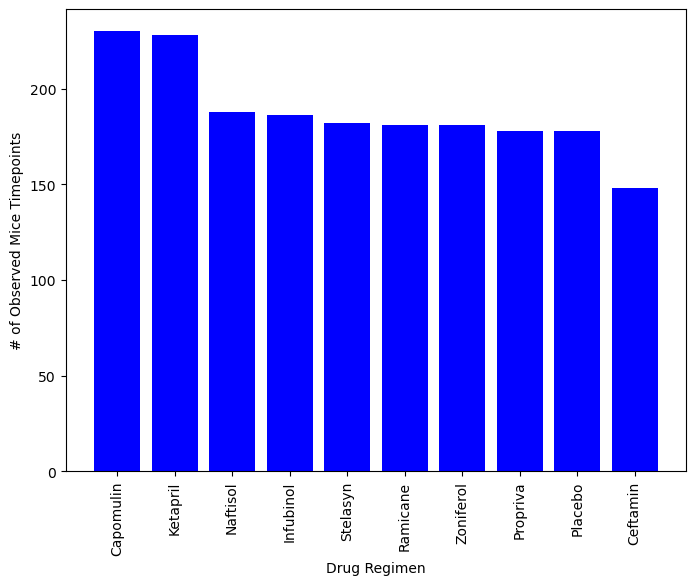

In [14]:
plt.figure(figsize=(8,6))
plt.bar(drug_regimen,drug_timepoint["Timepoint"],color='b',align="center")
plt.xticks(tick_locations,drug_regimen,rotation="vertical")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mice Timepoints")

In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mouse_sex_ratio=clean_mouse_study["Sex"].value_counts()
mouse_sex_df=pd.DataFrame(mouse_sex_ratio)
mouse_sex_df


,Sex
Male,958
Female,922


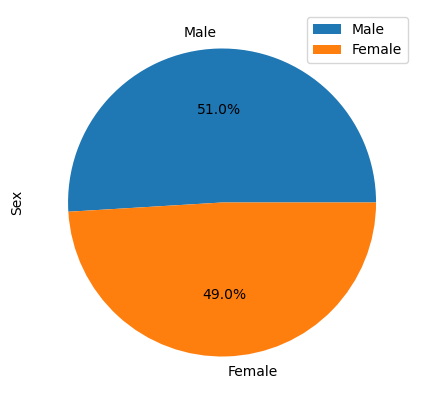

In [ ]:
mouse_sex_pie=mouse_sex_df.plot.pie(y="Sex",figsize=(5,5),autopct="%1.1f%%")

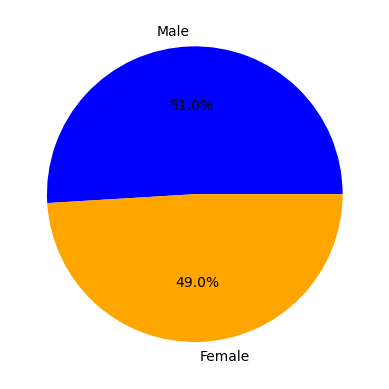

In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels=["Male","Female"]
male_mice=clean_mouse_study.loc[clean_mouse_study["Sex"]=="Male"]
female_mice=clean_mouse_study.loc[clean_mouse_study["Sex"]=="Female"]
sizes=[male_mice["Mouse ID"].count(),female_mice["Mouse ID"].count()]
colors=("blue","orange")
plt.pie(sizes,labels=labels,colors=colors,autopct="%1.1f%%",startangle=0)
plt.show()


## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
#pull the tumor volume from the final timepoint of each mouse.conditional loc?
#final_tumor_volume=

# Start by getting the last (greatest) timepoint for each mouse
max_tumor=clean_mouse_study.groupby(["Mouse ID"])["Timepoint"].max()
max_tumor=max_tumor.reset_index()
max_tumor_df=pd.DataFrame(max_tumor)


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_data=max_tumor.merge(clean_mouse_study,on=['Mouse ID','Timepoint'],how='left')
merged_data

,Mouse ID,Timepoint_x,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),Timepoint_y
0,b128,0,45.000000,0,Capomulin,Female,9,22,45
1,f932,0,45.000000,0,Ketapril,Male,15,29,0
2,g107,0,45.000000,0,Ketapril,Female,2,29,35
3,a457,0,45.000000,0,Ketapril,Female,11,30,10
4,c819,0,45.000000,0,Ketapril,Male,21,25,40
...,...,...,...,...,...,...,...,...,...
1875,r944,45,41.581521,2,Capomulin,Male,12,25,45
1876,u364,45,31.023923,3,Capomulin,Male,18,17,45
1877,p438,45,61.433892,1,Ceftamin,Female,11,26,45
1878,x773,45,58.634971,4,Placebo,Female,21,30,45


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)
treatments_list=["Capomulin","Ramicane","Infubinol","Ceftamin"]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [ ]:
# Create empty list to fill with tumor vol data (for plotting)
final_volume_list=[]
for row in treatments_list:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_volume = merged_data.loc[merged_data["Drug Regimen"] == row, 'Tumor Volume (mm3)']
    current_mouse= merged_data.loc[merged_data["Drug Regimen"] == row, 'Mouse ID']
    # add subset 
    final_volume_list.append([current_mouse,final_tumor_volume])

    # Determine outliers using upper and lower bounds

In [ ]:
#quartiles=timepoint_data.quantile([0.25,0.5,0.75])
#lowerq=quartiles[0.25]
#upperq=quartiles[0.75]
#iqr=upperq-lowerq

In [ ]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
#Was unable to make the plot because I could not generate my dataframe that I needed to create the boxplot

## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capo_mouse=clean_mouse_study.loc[clean_mouse_study["Drug Regimen"]=="Capomulin"]
capo_mouse["Mouse ID"].unique()
capo_mouse


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
226,j246,0,45.000000,0,Capomulin,Female,21,21
227,r554,0,45.000000,0,Capomulin,Female,8,17
228,s185,0,45.000000,0,Capomulin,Female,3,17
229,b742,0,45.000000,0,Capomulin,Male,7,21
...,...,...,...,...,...,...,...,...
1854,s710,45,40.728578,1,Capomulin,Female,1,23
1859,j119,45,38.125164,1,Capomulin,Female,7,23
1878,i557,45,47.685963,1,Capomulin,Female,1,24
1888,r944,45,41.581521,2,Capomulin,Male,12,25


Text(0.5, 1.0, 'Mouse s185 Tumor Volume with Capomulin')

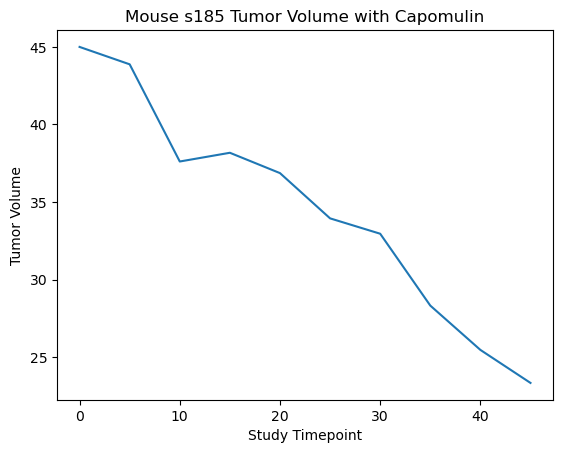

In [ ]:
line_mouse=clean_mouse_study.loc[clean_mouse_study["Mouse ID"]=="s185"]
line_mouse
line_x=line_mouse["Timepoint"]
line_y=line_mouse["Tumor Volume (mm3)"]
plt.plot(line_x,line_y)
plt.xlabel("Study Timepoint")
plt.ylabel("Tumor Volume")
plt.title("Mouse s185 Tumor Volume with Capomulin")

In [ ]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
scatter_x=capo_mouse.groupby(["Mouse ID"])["Weight (g)"].mean()
scatter_y=capo_mouse.groupby(["Mouse ID"])['Tumor Volume (mm3)'].mean()


## Correlation and Regression

The correlation coefficient is  0.84


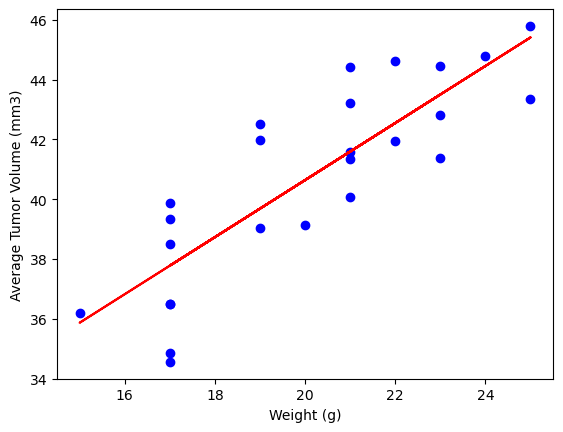

In [ ]:
# Calculate the correlation coefficient and a linear regression model 
(slope,intercept,rvalue,pvalue,stderr)=linregress(scatter_x,scatter_y)
regress_values=scatter_x*slope+intercept
line_eq="y="+str(round(slope,2))+"x+"+str(round(intercept,2))
plt.scatter(scatter_x,scatter_y,marker='o',color="blue")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.plot(scatter_x,regress_values,"r-")
print(f"The correlation coefficient is ",round(rvalue,2))
plt.show()
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
